In [1]:
import torch
import matplotlib.pyplot as plt
from dataset import FFHQDataset
from model import *
from config import Config

In [2]:
cfg = Config(
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu',
    lr = 1e-2,
    max_size = 64,
    epoches = 100,
    noise_mean = 0,
    noise_std = 1,
    z_dim = 512,
    max_channels = 512 # in_channels of G and out_channels of D
)

In [3]:
G64 = Generator(z_dim=cfg.z_dim, in_channels=cfg.max_channels, max_size=cfg.max_size).to(cfg.device)
D = Discriminator(max_size=cfg.max_size, out_channels=cfg.max_channels).to(cfg.device)

In [4]:
G32 = torch.load('G.pth')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


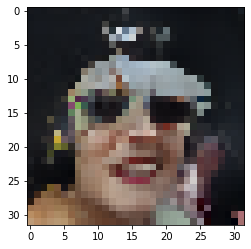

In [16]:
z = torch.normal(cfg.noise_mean, cfg.noise_std, size=(1, cfg.z_dim, 1, 1)).to(cfg.device)
with torch.no_grad():
    out = G64(z, step=3, alpha=1.0).squeeze().cpu().permute(1, 2, 0).numpy()
    #plt.figure(figsize=(2,2))
    plt.imshow(out)
    plt.show()
    

In [1]:
import yaml

In [15]:
with open('./configs/FFHQ128.yaml', 'r') as stream:
    data = yaml.load(stream, Loader=yaml.FullLoader)

In [3]:
class Config:
    @classmethod
    def load(cls, file_path):
        with open(file_path, 'r') as stream:
            data = yaml.load(stream, Loader=yaml.FullLoader)
        for (k, v) in data.items():
            setattr(cls, k, v)
        return cls

In [4]:
Config.load('./configs/FFHQ.yaml')

__main__.Config

In [5]:
Config.dataset

{'max_size': 128,
 'num_dataset': 30000,
 'fixed_z_path': './data/trained_models/fixed_z.pth'}

In [20]:
class Dict(dict):
    __setattr__ = dict.__setitem__
    __getattr__ = dict.__getitem__

def dict2obj(dictObj):
    if not isinstance(dictObj, dict):
        return dictObj
    d = Dict()
    for k, v in dictObj.items():
        d[k] = dictToObj(v)
    return d

def yaml2obj(filename):
    with open(filename, 'r') as stream:
        data = yaml.load(stream, Loader=yaml.FullLoader)
    return dict2obj(data)

In [32]:
d = yaml2obj('./configs/dog.yaml')

In [33]:
d

{'os': {'CUDA_VISIBLE_DEVICES': 3},
 'task': {'name': 'dog', 'id': '002'},
 'net': {'noise_mean': 0,
  'noise_std': 1,
  'z_dim': 512,
  'max_channels': 512,
  'preG_path': None,
  'preD_path': None},
 'dataset': {'max_size': 64, 'num_dataset': 30000, 'fixed_z_path': None},
 'train': {'device': 'cuda:0',
  'lr': 0.001,
  'epoches': 60,
  'current_step': 0,
  'current_epoch': 0},
 'output': {'output_dir': '/data1/cgl/tasks'}}

In [34]:
d.net.preG_path is None

True

In [35]:
import time

In [36]:
time.time()

1636111155.783628

In [37]:
t = time.time()

In [43]:
'step{:02d}-epoch{:03d}.png'.format(2, 3)

'step02-epoch003.png'

'20211105_191930'

In [46]:
!python main.py -c ./configs/dog.yaml

./configs/dog.yaml


In [47]:
import os

In [48]:
os.path.exists(None)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType

In [1]:
import dataset

In [2]:
len(getattr(dataset, 'DogDataset')())

20579